In [7]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from numpy import nan as NA

In [19]:
data = pd.DataFrame([[1., 6.5, 3.,NA], [1., NA, NA, NA],
                     [NA, NA, NA, NA], [NA, 6.5, 3., NA]])
data 

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [17]:
#하나라도 있으면 
data.dropna()
#모든값이 na인 로우만 지우기 
data.dropna(how='all')
data.dropna(thresh=1)
#모든값 na 칼럼 지우기
data.dropna(axis=1,how='all')
#na 3개 이상인 로우만 제거 
data.dropna(thresh=2)
#살아있는 값이 3개 이상인것만 뽑기
data.dropna(thresh=3)

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [25]:
#na에 평균값 채워넣기 
data = pd.Series([1., NA, 3.5, NA, 7]) 
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

In [33]:
#0-99 숫자 섞기 
np.random.permutation(100) #정수 중복없이 
a= np.arange(100)
np.random.shuffle(a)
a
np.random.randint(0,100,100) #중복있음 

array([94, 35, 81, 97, 76, 37, 22, 19, 17, 72, 58, 76, 66, 86, 24, 31, 22,
        1, 11, 10, 12,  4,  0, 81, 98, 37, 70, 12, 89, 52, 61, 79, 90, 59,
        4, 53, 16,  7,  3, 97, 31, 97, 15, 10, 10, 64, 70, 77, 87, 27, 94,
        4, 87, 30, 44, 51, 40, 19, 84, 97,  3, 27, 25, 41, 48, 72, 18, 38,
        3, 81, 69,  5, 75, 86, 34,  6, 20, 33, 42, 72, 50, 45,  8, 86, 75,
       55, 72, 82, 72, 53, 93, 44,  0, 71, 36, 49, 20, 74, 18, 90])

In [50]:
#표준정규분포 100,4 배열 
df= pd.DataFrame(np.random.randn(100,4))
#인덱스 섞기 
df.sample(100)
df.index = np.random.permutation(df.index)
#임의로 10개뽑기 
df.sample(10)


,0,1,2,3
24,0.012025,1.329526,0.244960,1.087236
49,-0.307148,0.079799,-2.190841,-1.102902
16,0.116148,-1.351280,0.729999,1.428054
48,-0.852508,-0.352424,-1.536526,0.724855
26,1.360771,1.385990,0.409356,2.290765
66,-0.276824,1.168404,1.336708,-0.082110
3,0.735390,0.501220,0.087726,1.038241
39,1.370881,0.241705,0.010076,-1.358369
99,0.603003,-1.435142,0.059041,-1.730074
13,-1.715789,0.278699,2.233148,0.449744


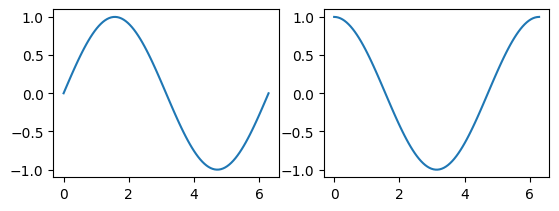

In [63]:
#subplot으로 사인 코사인 그리기 
fig=plt.figure()
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
x=np.linspace(0,np.pi*2,100)
ax1.plot(x,np.sin(x))
ax2.plot(x,np.cos(x))

In [68]:
#FIND INDEX차이 
FIND 는 없으면 -1 리턴, 인덱스는 에러 


4

In [71]:
#데이터 merge합치기 
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)}) 
pd.merge(df1,df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [72]:
text = """Dave 
dave@google.com

Steve 
steve@gmail.com

Rob 
rob@gmail.com

Ryan 
ryan@yahoo.com

""" 

In [74]:
import re
p=re.compile('[a-z].+@+[a-z]+.com')
p.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [77]:
#finditer 사용 for문 돌려야함 
for i in p.finditer(text):
    print(i.group())

dave@google.com
steve@gmail.com
rob@gmail.com
ryan@yahoo.com


In [79]:
a=p.finditer(text)
[i.group() for i in a]

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [88]:
#이름만 찾기 
p=re.compile('\w.+ ')
p.findall(text)

['Dave ', 'Steve ', 'Rob ', 'Ryan ']

In [89]:
#?= 전방탐색 
p = re.compile(".+(?=@)")
[
i.group
() for i in p.finditer(text)] 

['dave', 'steve', 'rob', 'ryan']

In [97]:
p = re.compile('\S.*[ ]')
[
i.group
().strip() for i in p.finditer(text)] 

['Dave', 'Steve', 'Rob', 'Ryan']

In [111]:
#이름 갯수만큼 * 로 바꾸기 
p = re.compile('(?P<id>.+)@[a-zA-Z]+[.]com')
for i in p.finditer(text):
    print(i.group("id"))
    p1 = re.compile("\w+(?=@)")
    n = len(i.group("id"))
    print(p1.sub("*"*n, i.group())) 

dave
****@google.com
steve
*****@gmail.com
rob
***@gmail.com
ryan
****@yahoo.com


In [110]:
p = re.compile('\w+@[a-zA-Z]+.com')
p1 = re.compile('\w+(?=@)')
[re.sub(p1, '*'*((j.span()[1]-j.span()[0])), 
i.group
()) for i,j in zip(p.finditer(text), p1.finditer(text))] 

['****@google.com', '*****@gmail.com', '***@gmail.com', '****@yahoo.com']

In [114]:
import math
#combination 중복허용 , 순서를 신경쓰지 않음 , permutation 순서를신경씀 
math.comb(5,3)

10

In [118]:
def solution(n,r): 
    return(math.comb(n,r))
solution(5,2)

10

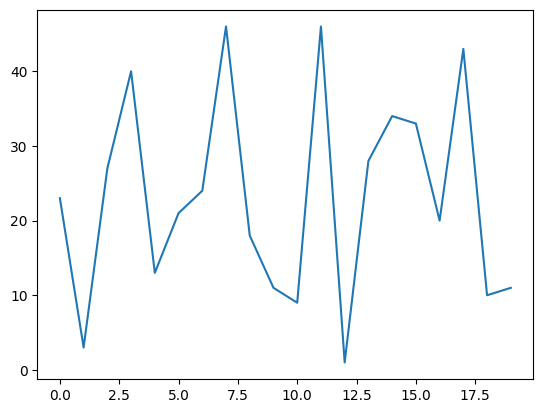

In [129]:
#1-50 까지 무작위 정수를 뽑아 선그래프 그리기 
plt.plot(np.random.randint(1,51,20))

<Axes: >

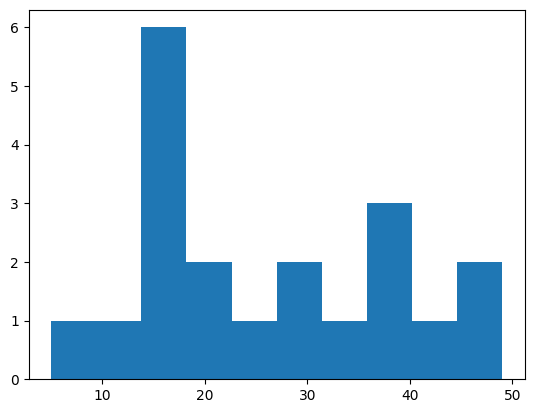

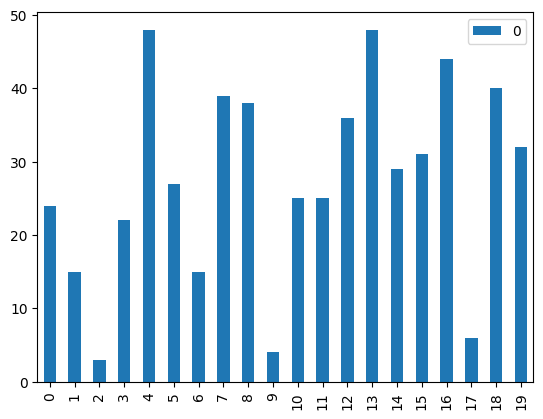

In [136]:
plt.hist(np.random.randint(1,51,20))

df = pd.DataFrame(np.random.randint(1,51,20))
df.plot(kind="bar") 

### merge?

In [144]:
arr=np.arange(12).reshape(3,4)
#concatenate무조건 대괄호 , default 아래로 나옴 . axis=1 가로 
np.concatenate([arr,arr], axis=1)
np.vstack([arr,arr])


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [149]:
s1=pd.Series([0,1],index=['a','b'])
s2=pd.Series([2,3,4],index=['c','d','e'])
s3=pd.Series([5,6],index=['f','g'])
pd.concat([s1,s2,s3],axis=1)
s4=pd.concat([s1,s3])
s4

a    0
b    1
f    5
g    6
dtype: int64

In [154]:
pd.concat([s1,s4],join='inner',axis=1)

,0,1
a,0,0
b,1,1


In [158]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                    columns=['one', 'two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                     columns=['three', 'four']) 
pd.concat([df1,df2],axis=1,keys=['level1','level2'])


level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [160]:
pd.concat([df1,df2],ignore_index=True)

,one,two,three,four
0,0.0,1.0,NaN,NaN
1,2.0,3.0,NaN,NaN
2,4.0,5.0,NaN,NaN
3,NaN,NaN,5.0,6.0
4,NaN,NaN,7.0,8.0


In [170]:
df1 = pd.DataFrame({'a': [1., np.nan, 5., np.nan],
                    'b': [np.nan, 2., np.nan, 6.],
                     'c': range(2, 18, 4)})
df2 = pd.DataFrame({'a': [5., 4., np.nan, 3., 7.],
                       'b': [np.nan, 3., 4., 6., 8.]}) 
df1+df2
pd.concat([df1,df2])
pd.merge(df1,df2)

,a,b,c
0,5.0,NaN,10


In [171]:
#다른 객체로 결측치 덮어쓰기 df1에 df2값만 추가 
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


In [172]:
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [246]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                       index=pd.Index(['Ohio', 'Colorado'], name='state'),
                        columns=pd.Index(['one', 'two', 'three'],
                        name='number'))
data.stack()

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

In [183]:
data.stack().unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [185]:
s1 = pd.Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([4, 5, 6], index=['c', 'd', 'e'])
data2 = pd.concat([s1, s2], keys=['one', 'two']) 
data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64

In [186]:

pd.melt()

TypeError: melt() missing 1 required positional argument: 'frame'

### wide -> long

In [406]:
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
                      'A': [1, 2, 3],
                      'B': [4, 5, 6],
                    'C': [7, 8, 9]})
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [414]:
#key의 칼럼 A,B,C 가 다 들어가있음 
pd.melt(df,['key'])
df.melt('key')
df.melt(id_vars='key', value_vars=['A','B','C'])
df.melt('key').pivot('key','variable','value').reset_index()

C:\Users\user\AppData\Local\Temp\ipykernel_13996\1235421401.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df.melt('key').pivot('key','variable','value').reset_index()


variable,key,A,B,C
0,bar,2,5,8
1,baz,3,6,9
2,foo,1,4,7


In [417]:
df.melt(value_vars=['A','B','C'])

,variable,value
0,A,1
1,A,2
2,A,3
3,B,4
4,B,5
5,B,6
6,C,7
7,C,8
8,C,9


In [418]:
pd.melt(df, id_vars=['key'],value_vars=['A','B','C'])


,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


## long -> wide

In [215]:
data=pd.read_csv('./macrodata.csv')
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [199]:
import os
os.getcwd()

'C:\\Users\\user\\test'

In [216]:
ldata

,date,item,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340
...,...,...,...
604,2009-06-30 23:59:59.999999999,infl,3.370
605,2009-06-30 23:59:59.999999999,unemp,9.200
606,2009-09-30 23:59:59.999999999,realgdp,12990.341
607,2009-09-30 23:59:59.999999999,infl,3.560


In [220]:
pivoted=ldata.pivot('date','item','value') #(index,column,calues)
pivoted

C:\Users\user\AppData\Local\Temp\ipykernel_13996\1467941842.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivoted=ldata.pivot('date','item','value') #(index,column,calues)


item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2
...,...,...,...
2008-09-30 23:59:59.999999999,-3.16,13324.600,6.0
2008-12-31 23:59:59.999999999,-8.79,13141.920,6.9
2009-03-31 23:59:59.999999999,0.94,12925.410,8.1


In [224]:
ldata['value2']=np.random.randn(len(ldata))
ldata

,date,item,value,value2
0,1959-03-31 23:59:59.999999999,realgdp,2710.349,2.538068
1,1959-03-31 23:59:59.999999999,infl,0.000,1.543547
2,1959-03-31 23:59:59.999999999,unemp,5.800,0.109213
3,1959-06-30 23:59:59.999999999,realgdp,2778.801,-0.982158
4,1959-06-30 23:59:59.999999999,infl,2.340,0.662026
...,...,...,...,...
604,2009-06-30 23:59:59.999999999,infl,3.370,-0.343670
605,2009-06-30 23:59:59.999999999,unemp,9.200,-0.768950
606,2009-09-30 23:59:59.999999999,realgdp,12990.341,0.067496
607,2009-09-30 23:59:59.999999999,infl,3.560,-0.505126


In [229]:
ldata.pivot('date','item') #마지막 지워서 계층적 컬럼 만듬 
ldata.iloc[:,:4].pivot('date','item')

C:\Users\user\AppData\Local\Temp\ipykernel_13996\3391029042.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ldata.pivot('date','item') #마지막 지워서 계층적 컬럼 만듬
C:\Users\user\AppData\Local\Temp\ipykernel_13996\3391029042.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ldata.iloc[:,:4].pivot('date','item')


value                     value2            \
item                           infl    realgdp unemp      infl   realgdp   
date                                                                       
1959-03-31 23:59:59.999999999  0.00   2710.349   5.8  1.543547  2.538068   
1959-06-30 23:59:59.999999999  2.34   2778.801   5.1  0.662026 -0.982158   
1959-09-30 23:59:59.999999999  2.74   2775.488   5.3  1.344699 -0.658154   
1959-12-31 23:59:59.999999999  0.27   2785.204   5.6  0.839042 -0.011751   
1960-03-31 23:59:59.999999999  2.31   2847.699   5.2  0.697800  1.410635   
...                             ...        ...   ...       ...       ...   
2008-09-30 23:59:59.999999999 -3.16  13324.600   6.0 -1.313652  0.166054   
2008-12-31 23:59:59.999999999 -8.79  13141.920   6.9  0.699161 -0.011047   
2009-03-31 23:59:59.999999999  0.94  12925.410   8.1 -0.254675  2.187685   
2009-06-30 23:59:59.999999999  3.37  12901.504   9.2 -0.343670 -1.561229   
2009-09-30 23:59:59.999999999  3.56  12990.341   9.6 -0.505126  0.067496   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999  0.109213  
1959-06-30 23:59:59.999999999 -1.130153  
1959-09-30 23:59:59.999999999 -0.270799  
1959-12-31 23:59:59.999999999 -0.231809  
1960-03-31 23:59:59.999999999  0.534032  
...                                 ...  
2008-09-30 23:59:59.999999999 -1.834038  
2008-12-31 23:59:59.999999999 -0.542655  
2009-03-31 23:59:59.999999999  1.433776  
2009-06-30 23:59:59.999999999 -0.768950  
2009-09-30 23:59:59.999999999 -0.721424  

[203 rows x 6 columns]

In [233]:
ldata.set_index(['date','item']).unstack()

value                     value2            \
item                           infl    realgdp unemp      infl   realgdp   
date                                                                       
1959-03-31 23:59:59.999999999  0.00   2710.349   5.8  1.543547  2.538068   
1959-06-30 23:59:59.999999999  2.34   2778.801   5.1  0.662026 -0.982158   
1959-09-30 23:59:59.999999999  2.74   2775.488   5.3  1.344699 -0.658154   
1959-12-31 23:59:59.999999999  0.27   2785.204   5.6  0.839042 -0.011751   
1960-03-31 23:59:59.999999999  2.31   2847.699   5.2  0.697800  1.410635   
...                             ...        ...   ...       ...       ...   
2008-09-30 23:59:59.999999999 -3.16  13324.600   6.0 -1.313652  0.166054   
2008-12-31 23:59:59.999999999 -8.79  13141.920   6.9  0.699161 -0.011047   
2009-03-31 23:59:59.999999999  0.94  12925.410   8.1 -0.254675  2.187685   
2009-06-30 23:59:59.999999999  3.37  12901.504   9.2 -0.343670 -1.561229   
2009-09-30 23:59:59.999999999  3.56  12990.341   9.6 -0.505126  0.067496   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999  0.109213  
1959-06-30 23:59:59.999999999 -1.130153  
1959-09-30 23:59:59.999999999 -0.270799  
1959-12-31 23:59:59.999999999 -0.231809  
1960-03-31 23:59:59.999999999  0.534032  
...                                 ...  
2008-09-30 23:59:59.999999999 -1.834038  
2008-12-31 23:59:59.999999999 -0.542655  
2009-03-31 23:59:59.999999999  1.433776  
2009-06-30 23:59:59.999999999 -0.768950  
2009-09-30 23:59:59.999999999 -0.721424  

[203 rows x 6 columns]

<Axes: >

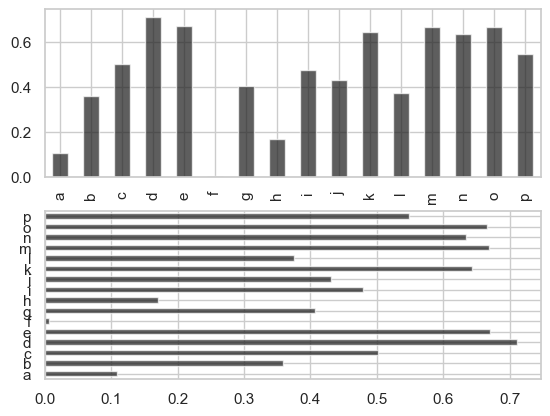

In [342]:
fig,axes=plt.subplots(2,1)
data=pd.Series(np.random.rand(16),index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0],color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k',alpha=0.7)

In [343]:
df = pd.DataFrame(np.random.rand(6, 4),
   ....:                   index=['one', 'two', 'three', 'four', 'five', 'six'],
   ....:                   columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
#인덱스를 컬럼으로 
df.stack().unstack(0)
df.T

,one,two,three,four,five,six
Genus,,,,,,
A,0.173272,0.509131,0.135085,0.169951,0.075640,0.649699
B,0.795726,0.123325,0.988410,0.696175,0.894037,0.934981
C,0.451796,0.419918,0.231140,0.382238,0.463691,0.669336
D,0.891679,0.787494,0.716301,0.901715,0.581753,0.352672


<Axes: xlabel='index'>

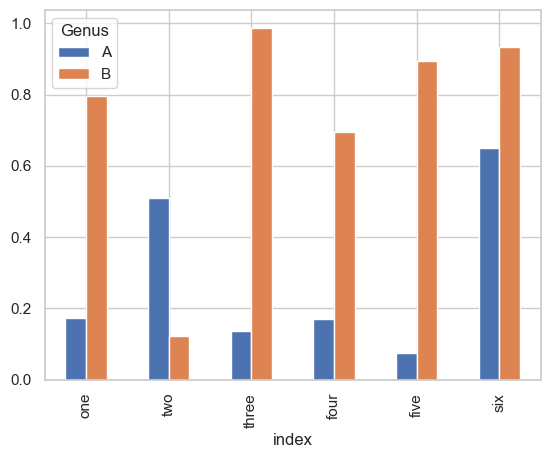

In [344]:
#'A','B'만 막대그래프 
df1=df.reset_index()
df1.plot.bar( x='index',y=['A','B'])

<Axes: >

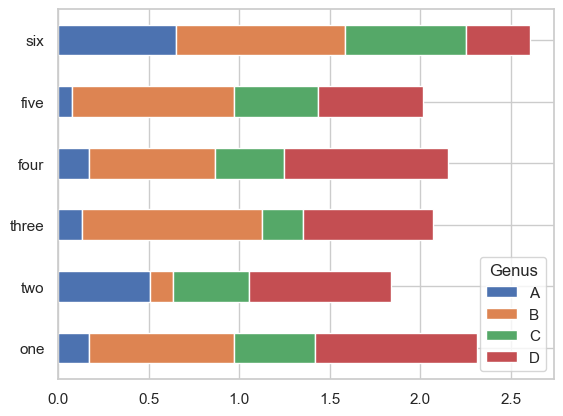

In [345]:
df.plot.barh(stacked=True)


<Axes: >

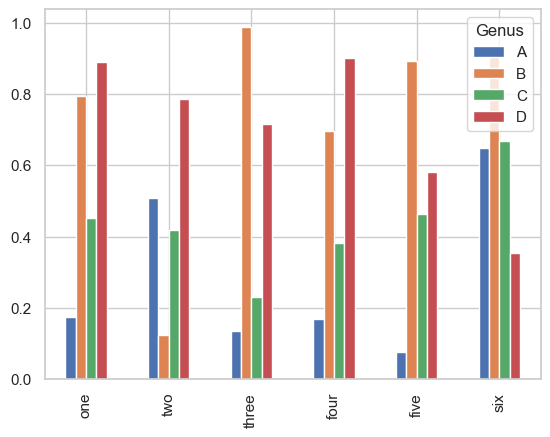

In [346]:
df.plot(kind='bar')

In [275]:
import pydataset
tips=pydataset.data('tips')


In [277]:
#성별로 팁 준 인원수?
tips['sex'].value_counts()
#요일
tips.day.unique()

Male      157
Female     87
Name: sex, dtype: int64

In [347]:
#총요금에 대한 팁의 비율 ->퍼센트로 
tips['tip_pct']=(tips.tip/tips.total_bill)*100

tips['tip_pct']=(tips.tip/(tips.total_bill-tips.tip))*100
tips.sort_values(by=['tip_pct'],ascending=False)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
173,7.25,5.15,Male,Yes,Sun,Dinner,2,245.238095
179,9.60,4.00,Female,Yes,Sun,Dinner,2,71.428571
68,3.07,1.00,Female,Yes,Sat,Dinner,1,48.309179
233,11.61,3.39,Male,No,Sat,Dinner,2,41.240876
184,23.17,6.50,Male,Yes,Sun,Dinner,4,38.992202
...,...,...,...,...,...,...,...,...
188,30.46,2.00,Male,Yes,Sun,Dinner,5,7.027407
1,16.99,1.01,Female,No,Sun,Dinner,2,6.320401
58,26.41,1.50,Female,No,Sat,Dinner,2,6.021678
103,44.30,2.50,Female,Yes,Sat,Dinner,3,5.980861


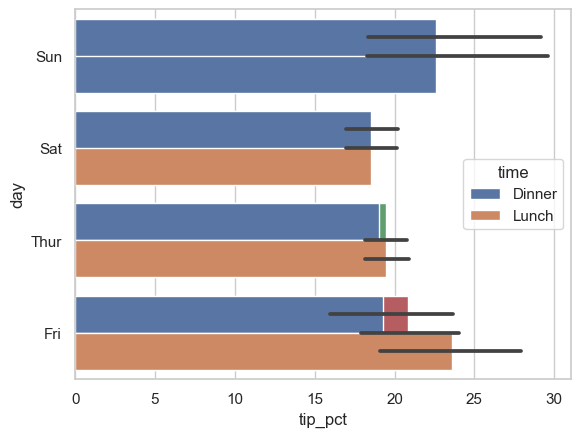

In [348]:
import seaborn as sns
#orient='h', 수평 막대 
sns.barplot(x='tip_pct',y='day', data=tips,orient='h')
sns.barplot(x='tip_pct',y='day',hue='time', data=tips,orient='h')
#hue= color -> 범례를 time으로 
#검은선 95% 신뢰구간 
sns.set(style='whitegrid')

In [313]:
df

Genus,A,B,C,D
one,0.401160,0.204132,0.357080,0.640094
two,0.510451,0.988826,0.140702,0.159267
three,0.000670,0.359946,0.818045,0.850972
four,0.824439,0.856753,0.297541,0.758119
five,0.704760,0.377407,0.428374,0.901065
six,0.650128,0.589383,0.575770,0.298392


In [349]:
party_counts=pd.crosstab(tips['day'],tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [350]:
party_counts=party_counts.iloc[:,1:-1]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


<Axes: xlabel='day'>

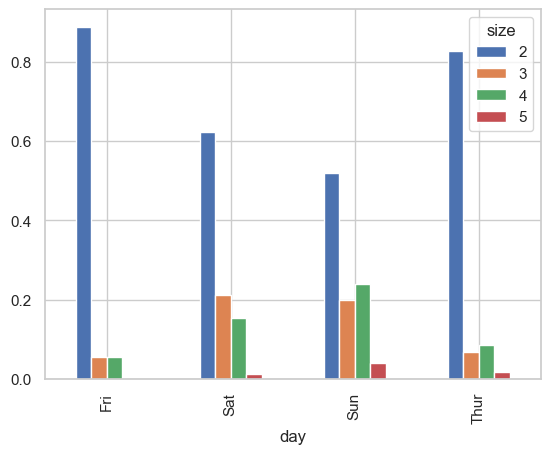

In [351]:
#합이 1이 되도록 정규화 가로마다 합을 구하고 비율로 나타냄 
party_pcts= party_counts.div(party_counts.sum(axis=1),axis=0)
party_pcts.plot.bar()

<Axes: xlabel='day', ylabel='value'>

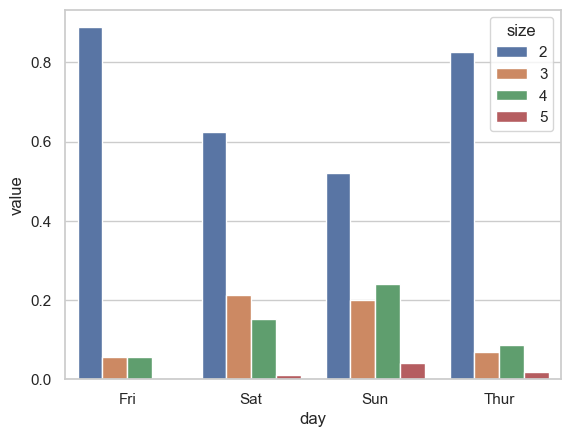

In [354]:
df=party_pcts.reset_index()
df
#melt-> wide -> long 
df.melt('day')
sns.barplot(data=df.melt('day'), x='day',y='value',hue='size')

<Axes: ylabel='Frequency'>

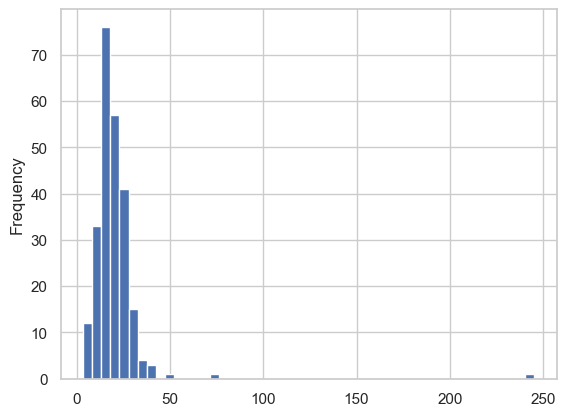

In [362]:
tips['tip_pct'].plot(kind='hist',bins=50,)

ModuleNotFoundError: No module named 'scipy'

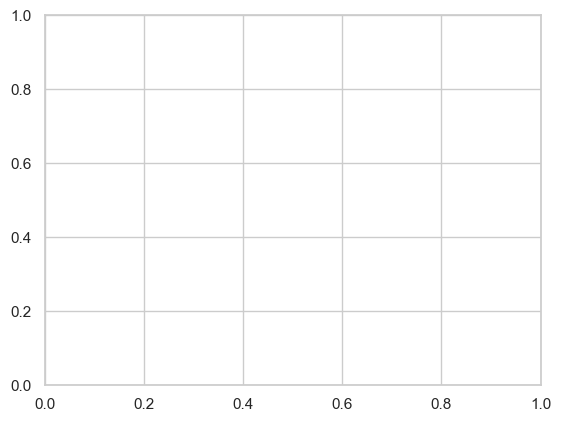

In [363]:
tips['tip_pct'].plot.density()

C:\Users\user\AppData\Local\Temp\ipykernel_13996\798846854.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(values,bins=100,color='k')


<Axes: ylabel='Density'>

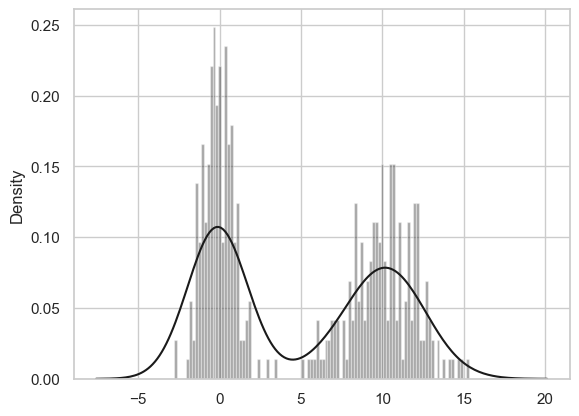

In [365]:
comp1=np.random.normal(0,1,200)
comp2= np.random.normal(10,2,200)
#두개 그래프 하나 그래프 위에 np.concatenate() 
values=pd.Series(np.concatenate([comp1,comp2]))
sns.distplot(values,bins=100,color='k')

<Axes: xlabel='realgdp', ylabel='realinv'>

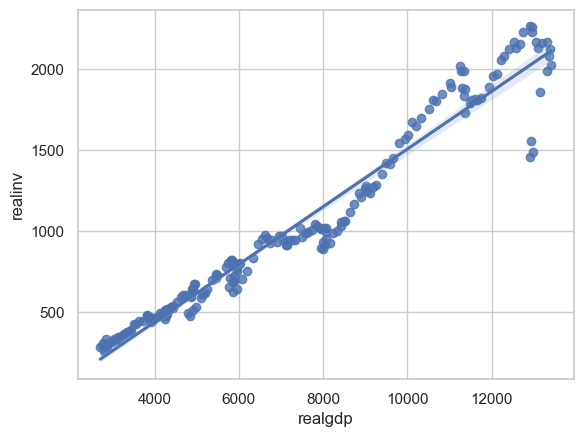

In [368]:
#regplot 선형회귀곡선
macro=pd.read_csv('macrodata.csv')
macro
sns.regplot(data=macro, x='realgdp',y='realinv')

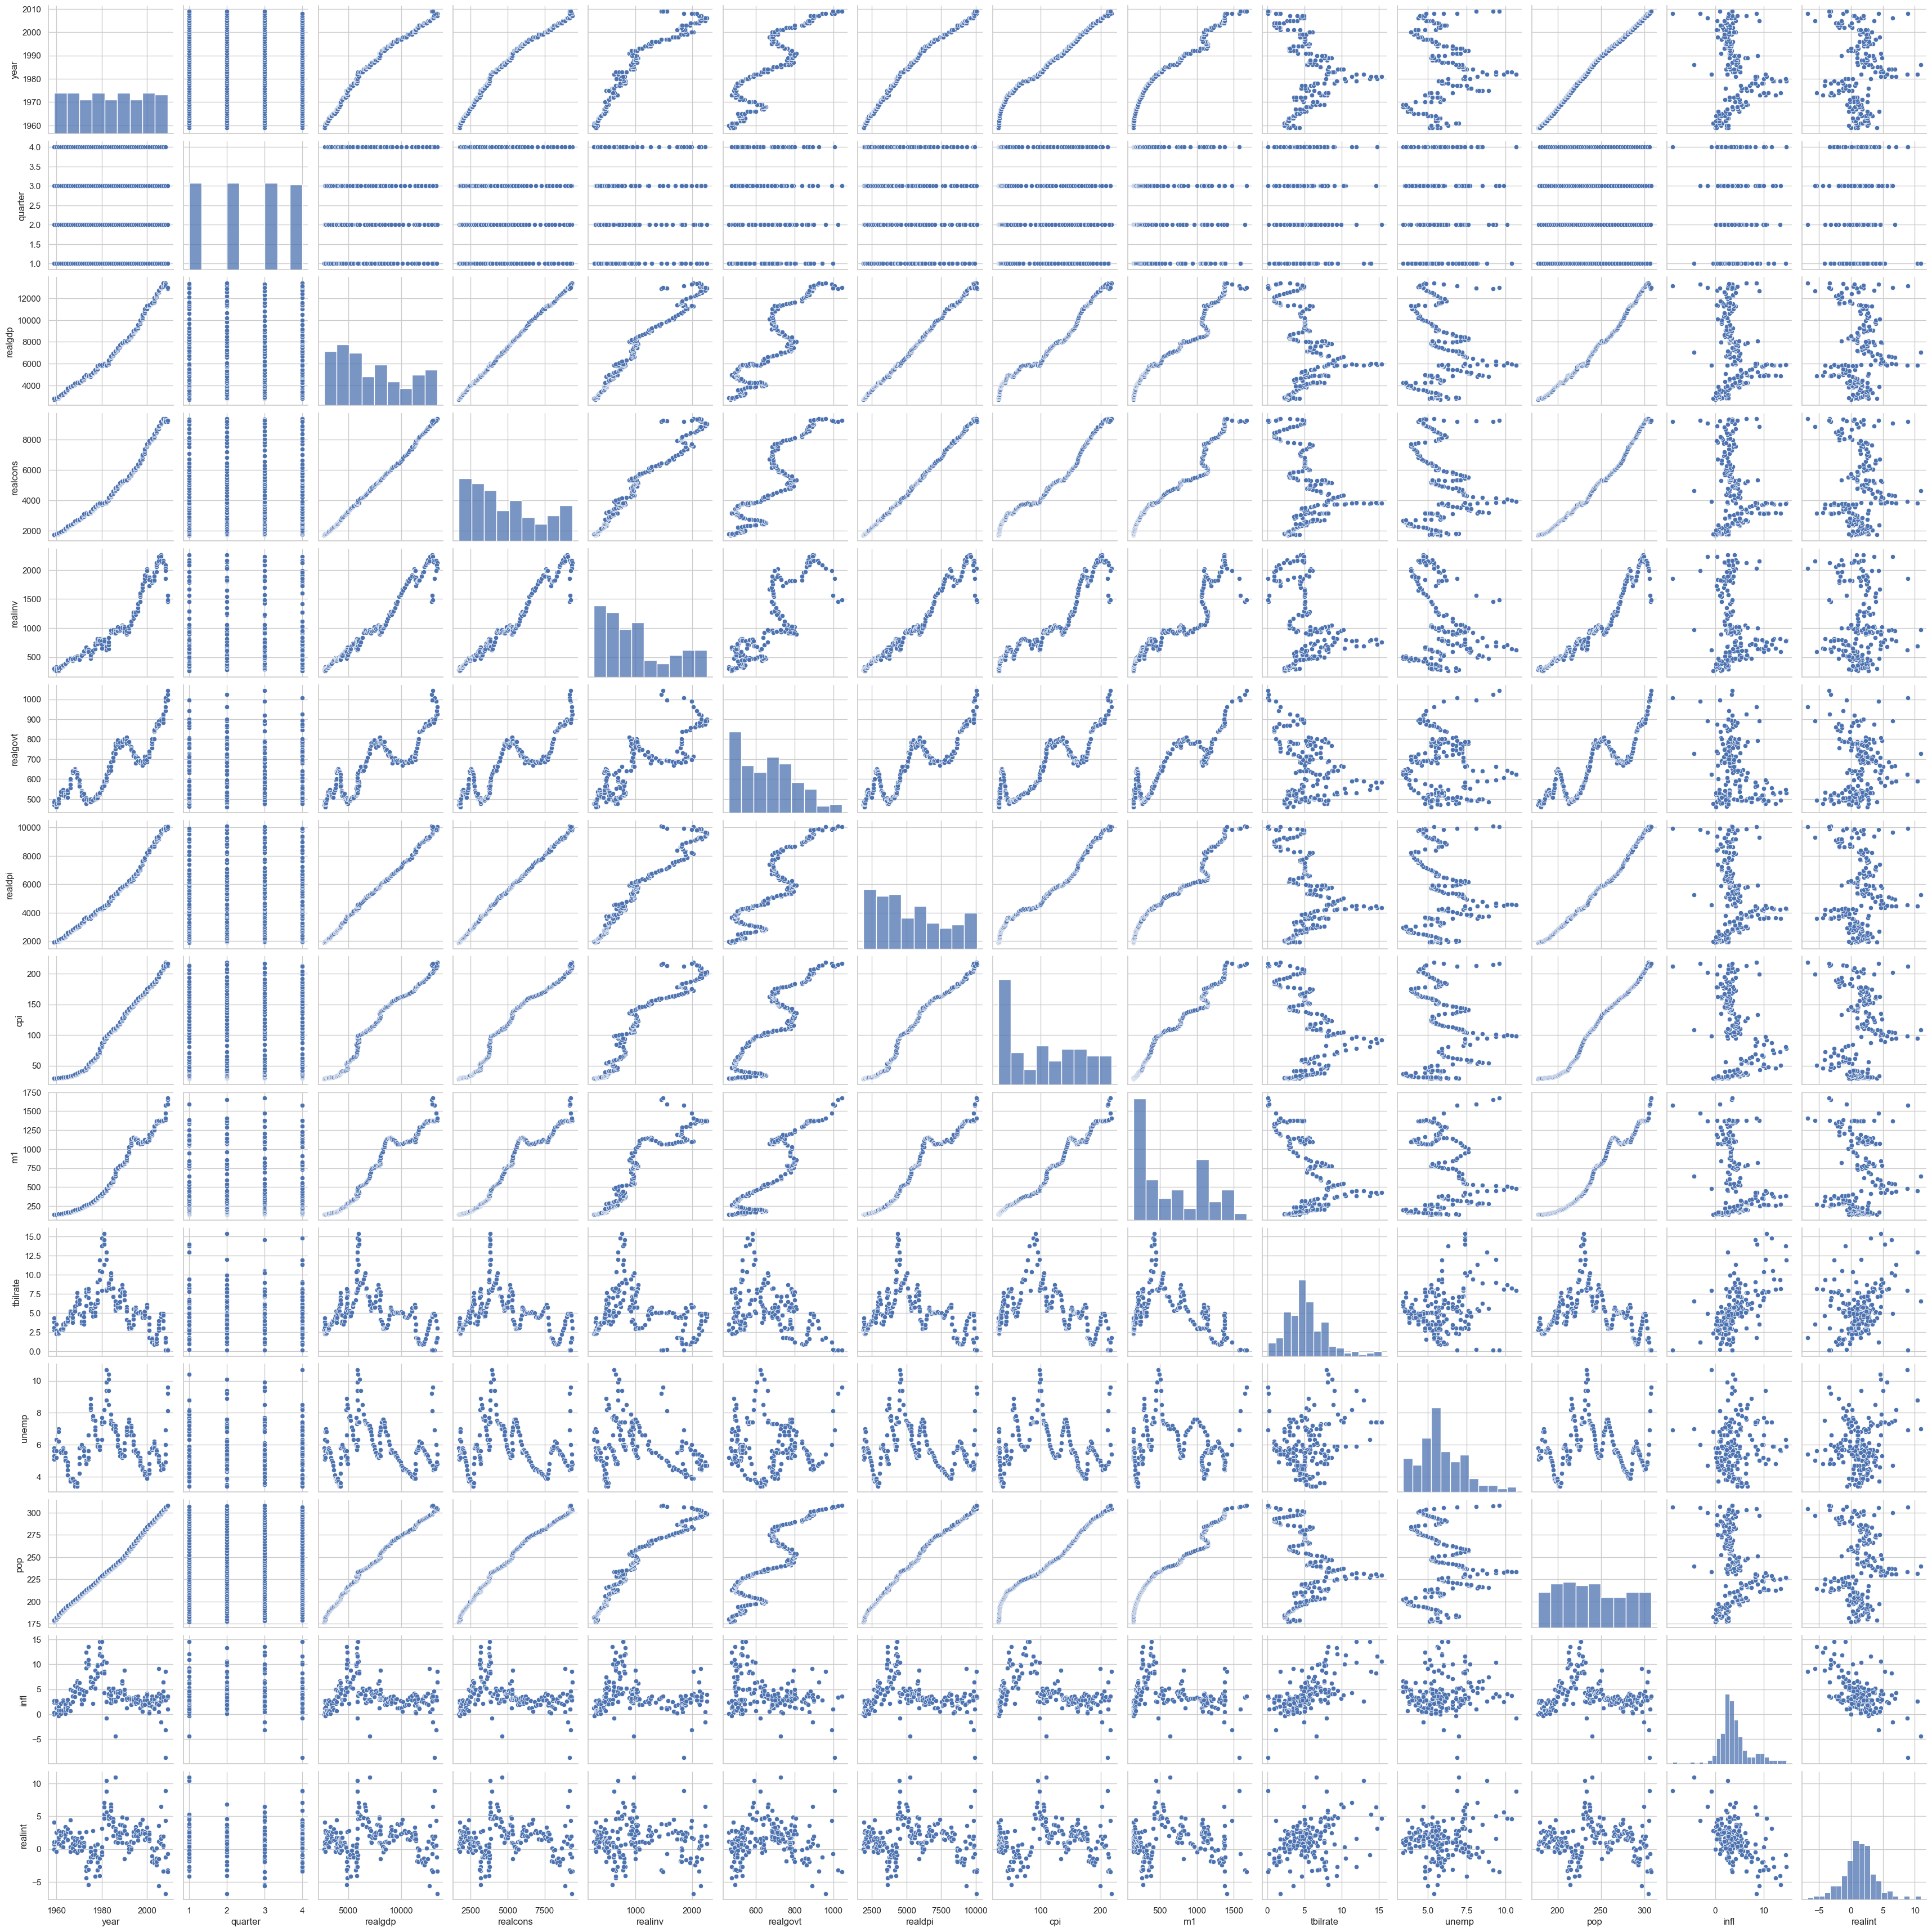

In [371]:
sns.pairplot(data=macro)

In [376]:
iris=pydataset.data('iris')
iris.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa


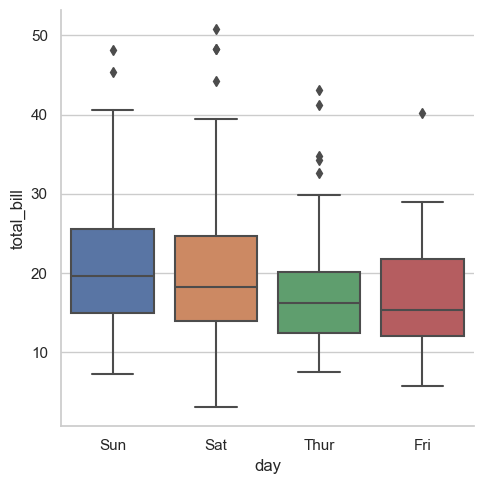

In [377]:
#범주형 함수 패싯 그리드 catplot 
sns.catplot(data=tips, x='day', y='total_bill',kind='box')

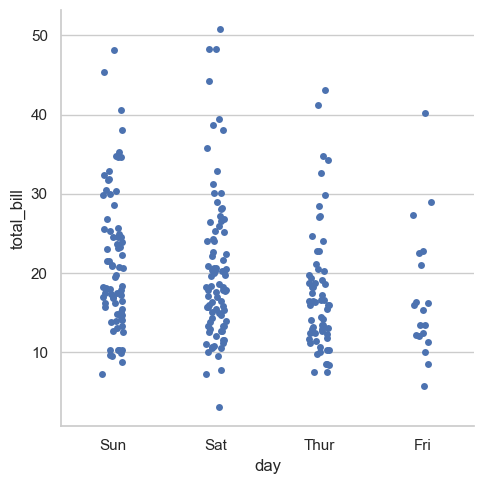

In [382]:
sns.catplot(data=tips, x='day', y='total_bill',kind='strip')

# Group by

In [384]:
df= pd.DataFrame({'key1':['a','a','b','b','a'],
                 'key2': ['one','two','one','two','one'],
                 'data1':np.random.randn(5),
                 'data2':np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-0.091412,-0.410115
1,a,two,-0.823594,0.872546
2,b,one,0.413812,-0.426962
3,b,two,0.468819,0.389672
4,a,one,-0.995063,0.130345


In [386]:
df['data1'].groupby(df['key1']).mean()

key1
a   -0.636689
b    0.441316
Name: data1, dtype: float64

In [393]:
for name, group in df.groupby(['key1','key2']):
    print(name)
    print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one -0.091412 -0.410115
4    a  one -0.995063  0.130345
('a', 'two')
  key1 key2     data1     data2
1    a  two -0.823594  0.872546
('b', 'one')
  key1 key2     data1     data2
2    b  one  0.413812 -0.426962
('b', 'two')
  key1 key2     data1     data2
3    b  two  0.468819  0.389672


In [397]:
#key1그룹짓고 data1보여조 
list(df.groupby('key1')['data1'])

[('a',
  0   -0.091412
  1   -0.823594
  4   -0.995063
  Name: data1, dtype: float64),
 ('b',
  2    0.413812
  3    0.468819
  Name: data1, dtype: float64)]

In [400]:
#df 만들때 대괄호로 한번 더 묶음  [[data1]]
df.groupby('key1')[['data1']].sum()

,data1
key1,
a,-1.910068
b,0.882631


In [405]:
#위아래 같음 
df.groupby(['key1','key2']).sum()[['data1']]
df.groupby(['key1','key2'])[['data1']].sum()

data1
key1 key2          
a    one  -1.086474
     two  -0.823594
b    one   0.413812
     two   0.468819

In [ ]:
list